Installing precursors

In [310]:
!pip install nltk

Mounting Drive

In [311]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Navigating to file and collecting data

In [312]:
import os
# Gets the contents from the file
def getJSONfiles(folder):
  path = "//content//drive//My Drive//Assignment 2//"
  diryr = path+folder+"//"
  files = os.listdir(diryr)

  files = [f for f in files if os.path.isfile(diryr + '/' + f)]
  return files

In [313]:
files2020 = getJSONfiles("2020")
files2021 = getJSONfiles("2021")
files2022 = getJSONfiles("2022")

In [314]:
import random

# Randomly selects the contents from each folder
random2020 = random.choices(files2020, k=10)
random2021 = random.choices(files2021, k=10)
random2022 = random.choices(files2022, k=10)

In [315]:
print(random2020[0])

185.25.51.173-20201006_en-US.json


Creating functions for preprocessing and json loading

In [316]:
def preprocess_json_file(file_content):

    # Split the content by '}\n{'
    json_objects = [obj.strip() for obj in file_content.split('}\n{')]

    # Add missing closing and opening braces to each JSON object
    json_objects = ['{' + obj + '}' for obj in json_objects]

    # replace double {{ and }} with single { and }, remove newlines
    for i in range(len(json_objects)):
        json_objects[i] = json_objects[i].replace('{{','{').replace('}}','}').replace('\n','')

    return json_objects

In [317]:
import json

def try_json_loads(obj):
  json_obj={}
  try:
    json_obj=json.loads(obj)
  except json.JSONDecodeError as e:
      print("Invalid JSON syntax", e)
      pass
  return json_obj

In [318]:
import pandas as pd

# Creating a process function to allow and prepare the data for analysing
def process_files_by_year(year, files):
  df_concat = pd.DataFrame()
  path = "//content//drive//My Drive//Assignment 2//deepl_translated_jabber//"
  for i in range(len(files)):
    filename = path + str(year) + "//" + files[i]

    with open(filename) as user_file:
      example_content = user_file.read()
      processed_json = preprocess_json_file(example_content)

    parsed_json_objects = [try_json_loads(obj) for obj in processed_json]
    df = pd.DataFrame(parsed_json_objects)
    df['newID'] = str(year) + "." + files[i].removesuffix('_en-US.json')
    df_concat = pd.concat([df_concat, df], axis=0)
  return df_concat

In [319]:
import pandas as pd
df2020 = process_files_by_year(2020, random2020)
df2021 = process_files_by_year(2021, random2021)
df2022 = process_files_by_year(2022, random2022)
df = pd.concat([df2020, df2021, df2022], axis=0)

Invalid JSON syntax Expecting ',' delimiter: line 1 column 268 (char 267)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 210 (char 209)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 268 (char 267)
Invalid JSON syntax Unterminated string starting at: line 1 column 127 (char 126)
Invalid JSON syntax Unterminated string starting at: line 1 column 128 (char 127)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 271 (char 270)
Invalid JSON syntax Unterminated string starting at: line 1 column 127 (char 126)
Invalid JSON syntax Expecting ':' delimiter: line 1 column 122 (char 121)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 150 (char 149)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 141 (char 140)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 192 (char 191)
Invalid JSON syntax Expecting ',' delimiter: line 1 column 318 (char 317)
Invalid JSON syntax Unterminated string starting at: line 1 column 132 (char 131)
Invali

In [320]:
df = pd.concat([df2020, df2021, df2022], axis=0)

# Concatenates the data so it is all in a single dataframe
print("num rows = " + str(len(df.index)))
print(df.head(5))
print(df.tail(5))

num rows = 5552
                           ts                           from  \
0  2020-10-06T00:52:56.530883  target@q3mcco35auwcstmt.onion   
1  2020-10-06T00:52:57.421137  target@q3mcco35auwcstmt.onion   
2  2020-10-06T00:53:00.960785  target@q3mcco35auwcstmt.onion   
3  2020-10-06T00:53:02.025719  target@q3mcco35auwcstmt.onion   
4  2020-10-06T00:53:03.411973  target@q3mcco35auwcstmt.onion   

                                 to            body  \
0  professor@q3mcco35auwcstmt.onion            prof   
1  professor@q3mcco35auwcstmt.onion           hello   
2  professor@q3mcco35auwcstmt.onion  where ad_users   
3  professor@q3mcco35auwcstmt.onion             all   
4  professor@q3mcco35auwcstmt.onion  all in general   

                         newID  
0  2020.185.25.51.173-20201006  
1  2020.185.25.51.173-20201006  
2  2020.185.25.51.173-20201006  
3  2020.185.25.51.173-20201006  
4  2020.185.25.51.173-20201006  
                             ts                          from  \
142  

In [321]:
df

,ts,from,to,body,newID
0,2020-10-06T00:52:56.530883,target@q3mcco35auwcstmt.onion,professor@q3mcco35auwcstmt.onion,prof,2020.185.25.51.173-20201006
1,2020-10-06T00:52:57.421137,target@q3mcco35auwcstmt.onion,professor@q3mcco35auwcstmt.onion,hello,2020.185.25.51.173-20201006
2,2020-10-06T00:53:00.960785,target@q3mcco35auwcstmt.onion,professor@q3mcco35auwcstmt.onion,where ad_users,2020.185.25.51.173-20201006
3,2020-10-06T00:53:02.025719,target@q3mcco35auwcstmt.onion,professor@q3mcco35auwcstmt.onion,all,2020.185.25.51.173-20201006
4,2020-10-06T00:53:03.411973,target@q3mcco35auwcstmt.onion,professor@q3mcco35auwcstmt.onion,all in general,2020.185.25.51.173-20201006
...,...,...,...,...,...
142,2022-01-27T20:38:26.395574,tramp@q3mcco35auwcstmt.onion,pumba@q3mcco35auwcstmt.onion,wait a minute ) don't drizzle ),2022.185.25.51.173-20220127
143,2022-01-27T20:38:36.181319,pumba@q3mcco35auwcstmt.onion,tramp@q3mcco35auwcstmt.onion,),2022.185.25.51.173-20220127
144,2022-01-27T20:38:37.631553,pumba@q3mcco35auwcstmt.onion,tramp@q3mcco35auwcstmt.onion,ok,2022.185.25.51.173-20220127
145,2022-01-27T20:40:12.436584,tramp@q3mcco35auwcstmt.onion,cybergangster@q3mcco35auwcstmt.onion,well yes,2022.185.25.51.173-20220127


In [322]:
# Creating a email mapping dictionary to automatically map each individual email to each other
email_mapping = {}
id_counter = 1
for email in set(df['from']):
    email_mapping[email] = f'ID{id_counter:03}'
    id_counter += 1

for email in set(df['to']):
    if email not in email_mapping:
        email_mapping[email] = f'ID{id_counter:03}'
        id_counter += 1

In [323]:
df['from'] = df['from'].map(email_mapping)
df['to'] = df['to'].map(email_mapping)

In [324]:
df

,ts,from,to,body,newID
0,2020-10-06T00:52:56.530883,ID029,ID080,prof,2020.185.25.51.173-20201006
1,2020-10-06T00:52:57.421137,ID029,ID080,hello,2020.185.25.51.173-20201006
2,2020-10-06T00:53:00.960785,ID029,ID080,where ad_users,2020.185.25.51.173-20201006
3,2020-10-06T00:53:02.025719,ID029,ID080,all,2020.185.25.51.173-20201006
4,2020-10-06T00:53:03.411973,ID029,ID080,all in general,2020.185.25.51.173-20201006
...,...,...,...,...,...
142,2022-01-27T20:38:26.395574,ID032,ID006,wait a minute ) don't drizzle ),2022.185.25.51.173-20220127
143,2022-01-27T20:38:36.181319,ID006,ID032,),2022.185.25.51.173-20220127
144,2022-01-27T20:38:37.631553,ID006,ID032,ok,2022.185.25.51.173-20220127
145,2022-01-27T20:40:12.436584,ID032,ID040,well yes,2022.185.25.51.173-20220127


In [325]:
email_mapping

{'marsel@q3mcco35auwcstmt.onion': 'ID001',
 'contisupport@q3mcco35auwcstmt.onion': 'ID002',
 'kagas@q3mcco35auwcstmt.onion': 'ID003',
 'alarm2@q3mcco35auwcstmt.onion': 'ID004',
 'globus@q3mcco35auwcstmt.onion': 'ID005',
 'pumba@q3mcco35auwcstmt.onion': 'ID006',
 'buza@q3mcco35auwcstmt.onion': 'ID007',
 'vampire@q3mcco35auwcstmt.onion': 'ID008',
 'tom@q3mcco35auwcstmt.onion': 'ID009',
 'total@q3mcco35auwcstmt.onion': 'ID010',
 'admin@q3mcco35auwcstmt.onion': 'ID011',
 'alarm@q3mcco35auwcstmt.onion': 'ID012',
 'urbanone@q3mcco35auwcstmt.onion': 'ID013',
 'hors@q3mcco35auwcstmt.onion': 'ID014',
 'dollar@q3mcco35auwcstmt.onion': 'ID015',
 'logan@q3mcco35auwcstmt.onion': 'ID016',
 'ahtyng@q3mcco35auwcstmt.onion': 'ID017',
 'flip@q3mcco35auwcstmt.onion': 'ID018',
 'dino@q3mcco35auwcstmt.onion': 'ID019',
 'tilar@q3mcco35auwcstmt.onion': 'ID020',
 'gorec@q3mcco35auwcstmt.onion': 'ID021',
 'tatarin@q3mcco35auwcstmt.onion': 'ID022',
 'ford@q3mcco35auwcstmt.onion': 'ID023',
 'braun@q3mcco35auwcst

In [326]:
import networkx as nx

# Using directed graph to show the flow of information between users
G = nx.DiGraph()

# Adds nodes for each email id to the graph
for email, node_id in email_mapping.items():
    G.add_node(node_id, email=email)

# Iterating over rows in the dataframe, while mapping emails to IDs, than checking and updating edge weights for the graph
for _, row in df.iterrows():
    from_id = row['from']
    to_id = row['to']
    if G.has_edge(from_id, to_id):
        G[from_id][to_id]['weight'] += 1
    else:
        G.add_edge(from_id, to_id, weight=1)

In [327]:
print(G)

DiGraph with 182 nodes and 618 edges


In [328]:
for from_id, to_id, data in G.edges(data=True):
    weight = data['weight']
    print(f"{from_id}:{to_id}, {weight}")

ID001:ID089, 13
ID001:ID099, 6
ID001:ID092, 22
ID001:ID154, 10
ID001:ID132, 3
ID001:ID104, 11
ID001:ID108, 6
ID001:ID044, 21
ID001:ID080, 5
ID001:ID083, 2
ID001:ID110, 1
ID001:ID027, 2
ID002:ID035, 1
ID003:ID132, 13
ID003:ID085, 6
ID003:ID049, 1
ID004:ID061, 2
ID005:ID024, 5
ID006:ID144, 10
ID006:ID032, 68
ID006:ID040, 5
ID006:ID168, 4
ID007:ID080, 2
ID007:ID039, 2
ID007:ID159, 1
ID007:ID082, 2
ID007:ID151, 5
ID007:ID033, 1
ID007:ID089, 1
ID007:ID029, 4
ID007:ID132, 2
ID007:ID081, 2
ID008:ID039, 1
ID009:ID039, 2
ID010:ID106, 1
ID010:ID093, 2
ID011:ID049, 5
ID012:ID061, 1
ID012:ID017, 1
ID012:ID035, 2
ID013:ID030, 2
ID014:ID116, 2
ID014:ID101, 1
ID014:ID132, 6
ID014:ID009, 3
ID015:ID132, 10
ID015:ID028, 2
ID015:ID034, 1
ID015:ID145, 8
ID015:ID040, 2
ID015:ID039, 35
ID016:ID132, 35
ID016:ID145, 1
ID016:ID080, 1
ID017:ID012, 2
ID018:ID145, 1
ID019:ID118, 4
ID020:ID149, 1
ID020:ID132, 1
ID021:ID120, 6
ID022:ID061, 1
ID023:ID102, 17
ID023:ID148, 2
ID023:ID039, 2
ID023:ID139, 1
ID023:ID138, 

In [329]:
weights = [(from_id, to_id, data['weight']) for from_id, to_id, data in G.edges(data=True)]
weights

[('ID001', 'ID089', 13),
 ('ID001', 'ID099', 6),
 ('ID001', 'ID092', 22),
 ('ID001', 'ID154', 10),
 ('ID001', 'ID132', 3),
 ('ID001', 'ID104', 11),
 ('ID001', 'ID108', 6),
 ('ID001', 'ID044', 21),
 ('ID001', 'ID080', 5),
 ('ID001', 'ID083', 2),
 ('ID001', 'ID110', 1),
 ('ID001', 'ID027', 2),
 ('ID002', 'ID035', 1),
 ('ID003', 'ID132', 13),
 ('ID003', 'ID085', 6),
 ('ID003', 'ID049', 1),
 ('ID004', 'ID061', 2),
 ('ID005', 'ID024', 5),
 ('ID006', 'ID144', 10),
 ('ID006', 'ID032', 68),
 ('ID006', 'ID040', 5),
 ('ID006', 'ID168', 4),
 ('ID007', 'ID080', 2),
 ('ID007', 'ID039', 2),
 ('ID007', 'ID159', 1),
 ('ID007', 'ID082', 2),
 ('ID007', 'ID151', 5),
 ('ID007', 'ID033', 1),
 ('ID007', 'ID089', 1),
 ('ID007', 'ID029', 4),
 ('ID007', 'ID132', 2),
 ('ID007', 'ID081', 2),
 ('ID008', 'ID039', 1),
 ('ID009', 'ID039', 2),
 ('ID010', 'ID106', 1),
 ('ID010', 'ID093', 2),
 ('ID011', 'ID049', 5),
 ('ID012', 'ID061', 1),
 ('ID012', 'ID017', 1),
 ('ID012', 'ID035', 2),
 ('ID013', 'ID030', 2),
 ('ID014

In [330]:
df['ts']

0      2020-10-06T00:52:56.530883
1      2020-10-06T00:52:57.421137
2      2020-10-06T00:53:00.960785
3      2020-10-06T00:53:02.025719
4      2020-10-06T00:53:03.411973
                  ...            
142    2022-01-27T20:38:26.395574
143    2022-01-27T20:38:36.181319
144    2022-01-27T20:38:37.631553
145    2022-01-27T20:40:12.436584
146    2022-01-27T20:40:20.381328
Name: ts, Length: 5552, dtype: object

In [331]:
grouped_data = df.groupby('from')['ts']
date_ranges = grouped_data.agg(['min', 'max'])
activity_frequency = grouped_data.count()

print(date_ranges.head(5))
print(date_ranges.tail(5))
print(activity_frequency)

                              min                         max
from                                                         
ID001  2020-08-23T14:06:08.229765  2020-11-11T22:21:24.991083
ID002  2020-09-05T14:01:12.608189  2020-09-05T14:01:12.608189
ID003  2020-07-04T08:31:29.529840  2022-01-27T19:12:41.296782
ID004  2020-10-13T08:48:07.069411  2020-10-13T08:48:08.975005
ID005  2021-05-21T08:49:02.924472  2021-05-21T09:55:08.657831
                              min                         max
from                                                         
ID153  2021-11-19T16:14:26.484430  2021-11-19T16:14:26.484430
ID154  2020-10-06T13:47:52.824879  2022-01-18T21:19:42.169420
ID155  2020-11-11T11:33:27.671196  2020-11-11T11:44:30.666178
ID156  2020-10-06T11:22:27.880616  2021-05-12T10:03:15.683479
ID157  2020-10-06T04:45:56.262745  2022-02-23T13:52:12.251331
from
ID001    102
ID002      1
ID003     20
ID004      2
ID005      5
        ... 
ID153      1
ID154     52
ID155      2
ID156     

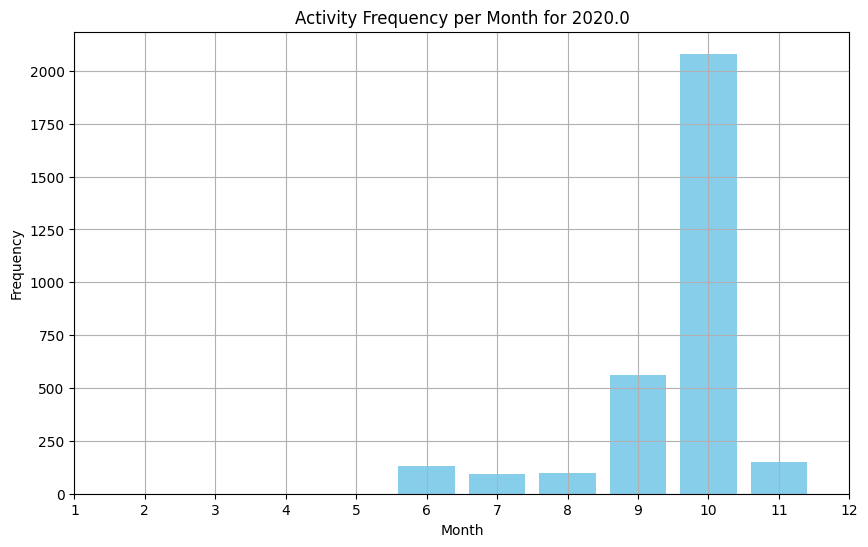

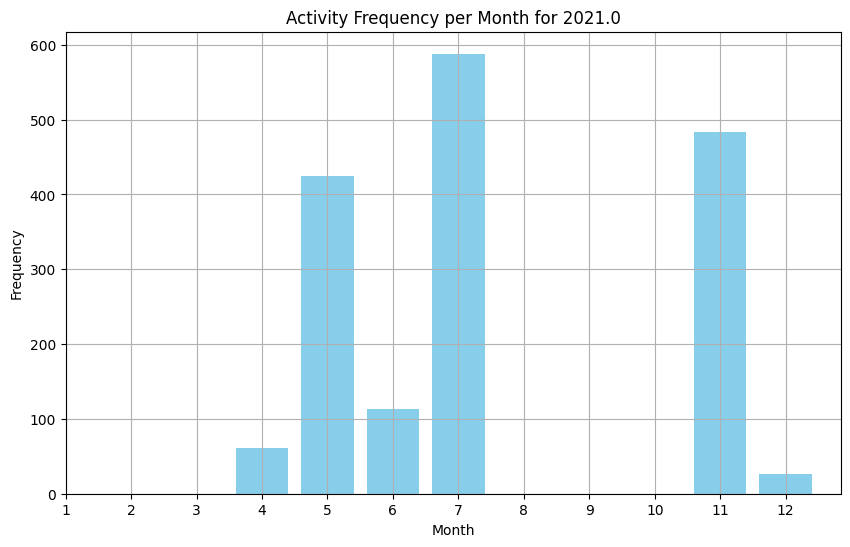

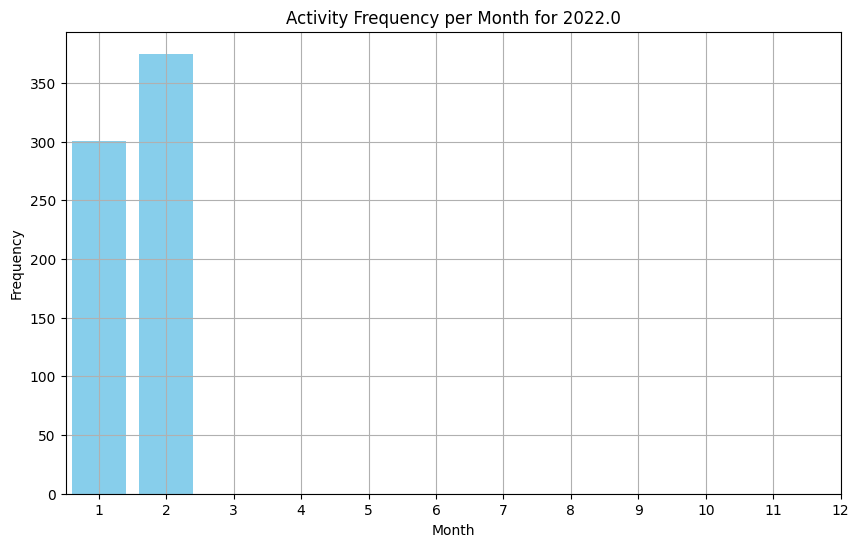

In [332]:
import matplotlib.pyplot as plt

# Converting the ts into datetime
df['ts'] = pd.to_datetime(df['ts'])

# Creating a variable for the year and month
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month

# Grouping the data by year and month, while also counting their activity during that time
activity_per_month = df.groupby(['year', 'month']).size().reset_index(name='activity_count')

# Plotting a histogram for each year to project the activity for each month
years = activity_per_month['year'].unique()
for year in years:
    data_year = activity_per_month[activity_per_month['year'] == year]
    plt.figure(figsize=(10, 6))
    plt.bar(data_year['month'], data_year['activity_count'], color='skyblue')
    plt.title(f'Activity Frequency per Month for {year}')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

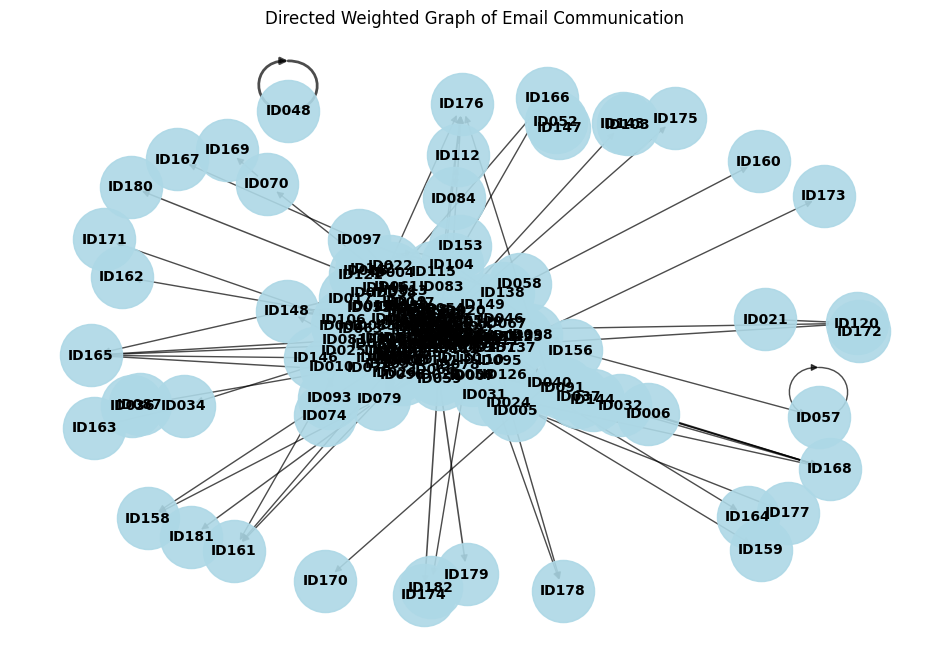

In [333]:
G = nx.DiGraph()

# Add nodes for each email ID to the graph
for from_id, to_id, _ in weights:
    G.add_node(from_id)
    G.add_node(to_id)

# Add weighted edges between nodes representing email communication
for from_id, to_id, weight in weights:
    G.add_edge(from_id, to_id, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position nodes using a spring layout algorithm

# Calculate edge thickness based on the weight
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
max_weight = max(edge_weights)
min_weight = min(edge_weights)
edge_thickness = [(weight - min_weight) / (max_weight - min_weight) * 5 + 1 for weight in edge_weights]

# Draw edges with thickness proportional to the weight
nx.draw_networkx_edges(G, pos, width=edge_thickness, alpha=0.7)

# Draw nodes with labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Directed Weighted Graph of Email Communication')
plt.axis('off')
plt.show()


In [334]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'ID001': 0.12154696132596685,
 'ID089': 0.38121546961325964,
 'ID099': 0.09392265193370165,
 'ID092': 0.055248618784530384,
 'ID154': 0.1270718232044199,
 'ID132': 0.5193370165745856,
 'ID104': 0.143646408839779,
 'ID108': 0.022099447513812154,
 'ID044': 0.049723756906077346,
 'ID080': 0.11602209944751381,
 'ID083': 0.055248618784530384,
 'ID110': 0.049723756906077346,
 'ID027': 0.049723756906077346,
 'ID002': 0.011049723756906077,
 'ID035': 0.04419889502762431,
 'ID003': 0.03314917127071823,
 'ID085': 0.011049723756906077,
 'ID049': 0.07734806629834254,
 'ID004': 0.011049723756906077,
 'ID061': 0.07734806629834254,
 'ID005': 0.011049723756906077,
 'ID024': 0.06077348066298342,
 'ID006': 0.03867403314917127,
 'ID144': 0.03867403314917127,
 'ID032': 0.055248618784530384,
 'ID040': 0.11049723756906077,
 'ID168': 0.027624309392265192,
 'ID007': 0.1602209944751381,
 'ID039': 0.30939226519337015,
 'ID159': 0.0055248618784530384,
 'ID082': 0.09944751381215469,
 'ID151': 0.022099447513812154

In [335]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'ID001': 0.017323049617728688,
 'ID089': 0.1747565089309603,
 'ID099': 0.010702090015965178,
 'ID092': 0.0013532003345539257,
 'ID154': 0.030469499698078415,
 'ID132': 0.26015417849931854,
 'ID104': 0.03660496266947837,
 'ID108': 0.0,
 'ID044': 0.0011625056241818994,
 'ID080': 0.03551823743143747,
 'ID083': 0.0009578331195854619,
 'ID110': 0.012599992575577437,
 'ID027': 0.0010538538945537108,
 'ID002': 0.00013300593411090652,
 'ID035': 0.03069159141948197,
 'ID003': 0.009488560515264012,
 'ID085': 0.0,
 'ID049': 0.018538752165986244,
 'ID004': 0.0,
 'ID061': 0.028931943593545804,
 'ID005': 0.0,
 'ID024': 0.012972657691133475,
 'ID006': 0.0008569593829359268,
 'ID144': 0.006010425748903505,
 'ID032': 0.006302074709823522,
 'ID040': 0.03711671905837508,
 'ID168': 0.0,
 'ID007': 0.043300108061704444,
 'ID039': 0.1510411082879165,
 'ID159': 0.0,
 'ID082': 0.0097057362260123,
 'ID151': 0.00023374807444789033,
 'ID033': 0.014032255207681697,
 'ID029': 0.026035688567540582,
 'ID081': 0.0262

In [336]:
high_degree_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.1]

high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0.1]

In [337]:
print("Nodes with high degree centrality:", high_degree_nodes)
print("Nodes with high betweenness centrality", high_betweenness_nodes)

# Looks through all of the emails and finds the ones that have the highest betweenness and degree, to assist in determining the most important members
important_members = set(high_degree_nodes).intersection(high_betweenness_nodes)


Nodes with high degree centrality: ['ID001', 'ID089', 'ID154', 'ID132', 'ID104', 'ID080', 'ID040', 'ID007', 'ID039', 'ID029', 'ID081', 'ID145', 'ID149']
Nodes with high betweenness centrality ['ID089', 'ID132', 'ID039']


In [338]:
print('The most importand members at are: ')
for node in important_members:
  print(node)

The most importand members at 10% are: 
ID132
ID089
ID039


In [339]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [340]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Setting up the analyzer for use
analyzer = SentimentIntensityAnalyzer()

In [341]:
analyzer.polarity_scores(str(grouped_data))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [342]:
grouped_data = df.groupby('body').agg(lambda x: ''.join(str(e) for e in set(x))).reset_index()

In [343]:
grouped_data

,body,ts,from,to,newID,year,month
0,2020-10-13{backslash}n[01:16:31] <green> this...,2020-10-13 03:08:56.936639,ID089,ID157,2020.185.25.51.173-20201013,2020.0,10.0
1,<bentley> ready {backslash}n[14:34:00] <bentl...,2022-01-02 11:25:18.361651,ID089,ID164,2022.185.25.51.173-20220102,2022.0,1.0
2,<bill> 08(&JRH^EG%X$5y3tc4y9v50tb8YM()KT(78rn...,2020-10-06 08:35:50.097957,ID089,ID073,2020.185.25.51.173-20201006,2020.0,10.0
3,<doomsday> testlab{backslash}{backslash}jschi...,2020-10-06 14:37:20.024220,ID086,ID113,2020.185.25.51.173-20201006,2020.0,10.0
4,Download: https://qaz.im/load/43GGB9/NtHHGh {...,2020-09-05 12:53:49.8037632020-09-05 10:17:01....,ID029,ID089,2020.185.25.51.173-20200905,2020.0,9.0
...,...,...,...,...,...,...,...
3777,{backslash}you better tell me how to typedef f...,2020-11-11 09:01:10.818599,ID152,ID033,2020.185.25.51.173-20201111,2020.0,11.0
3778,{backslash}{backslash}{backslash},2020-10-13 15:33:09.0440022020-07-11 17:52:37....,ID065ID082ID012,ID035ID107ID132,2021.185.25.51.173-202107162020.185.25.51.173-...,2020.02021.0,10.07.0
3779,Привет{backslash}n{backslash}nbot{backslash}n{...,2020-10-13 06:06:15.8861602020-10-13 07:29:05....,ID104,ID007ID127,2020.185.25.51.173-20201013,2020.0,10.0
3780,отово,2020-10-06 13:22:47.451144,ID062,ID096,2020.185.25.51.173-20201006,2020.0,10.0


In [344]:
def calculate_sentiment(text):
    return analyzer.polarity_scores(text)

In [345]:
# prompt: Using grouped_data, do a sentiment analysis of each email

grouped_data['sentiment'] = grouped_data['body'].apply(calculate_sentiment)
grouped_data.head()


,body,ts,from,to,newID,year,month,sentiment
0,2020-10-13{backslash}n[01:16:31] <green> this...,2020-10-13 03:08:56.936639,ID089,ID157,2020.185.25.51.173-20201013,2020.0,10.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,<bentley> ready {backslash}n[14:34:00] <bentl...,2022-01-02 11:25:18.361651,ID089,ID164,2022.185.25.51.173-20220102,2022.0,1.0,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
2,<bill> 08(&JRH^EG%X$5y3tc4y9v50tb8YM()KT(78rn...,2020-10-06 08:35:50.097957,ID089,ID073,2020.185.25.51.173-20201006,2020.0,10.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,<doomsday> testlab{backslash}{backslash}jschi...,2020-10-06 14:37:20.024220,ID086,ID113,2020.185.25.51.173-20201006,2020.0,10.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Download: https://qaz.im/load/43GGB9/NtHHGh {...,2020-09-05 12:53:49.8037632020-09-05 10:17:01....,ID029,ID089,2020.185.25.51.173-20200905,2020.0,9.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [346]:
# Define a list of technical terms related to ransomware scripts
technical_terms = [
    ".conti",
    "network",
    "bitcoin",
    "payment",
    "malware",
    "encrypted",
    "decrypt",
    "payload",
    "antivirus",
    "proof"
]


# Create a function to count the occurrences of technical terms in a text
def count_technical_terms(text):
    count = 0
    for term in technical_terms:
        if term in text.lower():
            count += 1
    return count

# Apply the function to the 'body' column of the grouped_data DataFrame
grouped_data['technical_term_count'] = grouped_data['body'].apply(count_technical_terms)

# Print the head and tail of the grouped_data DataFrame
print(grouped_data.head())
print(grouped_data.tail())


                                                body  \
0   2020-10-13{backslash}n[01:16:31] <green> this...   
1   <bentley> ready {backslash}n[14:34:00] <bentl...   
2   <bill> 08(&JRH^EG%X$5y3tc4y9v50tb8YM()KT(78rn...   
3   <doomsday> testlab{backslash}{backslash}jschi...   
4   Download: https://qaz.im/load/43GGB9/NtHHGh {...   

                                                  ts   from     to  \
0                         2020-10-13 03:08:56.936639  ID089  ID157   
1                         2022-01-02 11:25:18.361651  ID089  ID164   
2                         2020-10-06 08:35:50.097957  ID089  ID073   
3                         2020-10-06 14:37:20.024220  ID086  ID113   
4  2020-09-05 12:53:49.8037632020-09-05 10:17:01....  ID029  ID089   

                         newID    year month  \
0  2020.185.25.51.173-20201013  2020.0  10.0   
1  2022.185.25.51.173-20220102  2022.0   1.0   
2  2020.185.25.51.173-20201006  2020.0  10.0   
3  2020.185.25.51.173-20201006  2020.0  10.0   
4 

In [347]:
# Prints all emails that contain technical terms and their technical term count

technical_emails = grouped_data[grouped_data['technical_term_count'] > 0]
for _, row in technical_emails.iterrows():
    print(f"Email: {row['to']}")
    print(f"Technical term count: {row['technical_term_count']}")
    print(f"Body: {row['body']}")
    print(f"Terms: {', '.join([term for term in technical_terms if term in row['body'].lower()])}")
    print("-------------------")


Email: ID056
Technical term count: 1
Body: - does not send the file with the file lending (README_FOR_DECRYPT.txt) to the desktop; (This happens if I choose to encrypt certain folders. By convention, the file should always appear on the desktop.)
Terms: decrypt
-------------------
Email: ID036
Technical term count: 1
Body: 1) writes either the tax (well, in this believe it unlikely), or any consultant, etc. tax.{backslash}the gist - in your declaration (application for a tax deduction, a letter to the tax office, etc.) detected an error. And this is the form where you fill in the necessary information. {backslash}The form is enclosed. {backslash}It can be a little bit of a scare - like in the case of..... measures will be taken and sanctions will be imposed.{backslash}n{backslash}nSUBJ: {Error|Mistake|Incorrect information|Improper information} in the {received|collected|accepted|sent} {statement|declaration} {n{backslash}nBODY:{backslash}n{Good day|Hello|Good morning|Good afternoon|Go

In [348]:
# Create a dictionary to store the counts of each technical term
term_counts = {}

# Loop through the technical terms
for term in technical_terms:
    term_counts[term] = 0

# Loop through the rows of the grouped_data DataFrame
for _, row in grouped_data.iterrows():
    body = row['body']

    # Check if the term is present in the body
    for term in technical_terms:
        if term in body.lower():
            term_counts[term] += 1

total_technical_terms = sum(term_counts.values())
technical_emails_count = grouped_data[grouped_data['technical_term_count'] > 0].shape[0]

In [349]:
print(f"In total there are {total_technical_terms} tecnical terms found within {technical_emails_count} emails")
# Print the count of each term
print("These are the terms found:")
for term, count in term_counts.items():
    print(f"{term}: {count}")



In total there are 50 tecnical terms found within 43 emails
These are the terms found:
.conti: 0
network: 4
bitcoin: 4
payment: 11
malware: 0
encrypted: 6
decrypt: 20
payload: 0
antivirus: 3
proof: 2


Using this code allows to find the senders and recipients of these key terms

In [350]:
# Creates a dictionary to store the counts of each technical term
term_counts = {}

# Loops through the technical terms
for term in technical_terms:
    term_counts[term] = 0

# Loops through the rows of the grouped_data DataFrame
for _, row in grouped_data.iterrows():
    body = row['body']

    # Checking if a term is present in the body
    for term in technical_terms:
        if term in body.lower():
            term_counts[term] += 1

# Creates a dictionary to store the senders and recipients of technical emails
sender_recipient_dict = {}

# Loops through the rows of the grouped_data DataFrame
for _, row in grouped_data.iterrows():
    body = row['body']

    # This is checking if the emails have any of the technical terms
    if any(term in body.lower() for term in technical_terms):
        # Once they find it, they retrieve who the senders and recipients of these technical terms are
        sender = row['from']
        recipient = row['to']

        # Adds the sender and recipients to the dictionary
        if sender not in sender_recipient_dict:
            sender_recipient_dict[sender] = []
        sender_recipient_dict[sender].append(recipient)

# Prints the senders and recipients of emails
for sender, recipients in sender_recipient_dict.items():
    print(f"Sender: {sender}")
    print(f"Recipients: {recipients}")
    print("-------------------")



Sender: ID024
Recipients: ['ID056', 'ID056']
-------------------
Sender: ID087
Recipients: ['ID036', 'ID036', 'ID036']
-------------------
Sender: ID037
Recipients: ['ID168', 'ID168', 'ID144', 'ID144', 'ID040', 'ID040', 'ID040', 'ID144']
-------------------
Sender: ID085
Recipients: ['ID003']
-------------------
Sender: ID030
Recipients: ['ID039']
-------------------
Sender: ID145
Recipients: ['ID132', 'ID132']
-------------------
Sender: ID132
Recipients: ['ID080', 'ID145', 'ID029']
-------------------
Sender: ID006
Recipients: ['ID144', 'ID032', 'ID040ID168']
-------------------
Sender: ID039
Recipients: ['ID132', 'ID132']
-------------------
Sender: ID016
Recipients: ['ID132', 'ID132']
-------------------
Sender: ID128
Recipients: ['ID145']
-------------------
Sender: ID118ID038ID145
Recipients: ['ID038ID145ID118ID099']
-------------------
Sender: ID038ID145ID099ID118
Recipients: ['ID038ID128ID099ID145ID118']
-------------------
Sender: ID080
Recipients: ['ID132', 'ID081', 'ID132', 

There are various more experiments that could be done to better understand the data, some include using machine learning to analyse the data, others could be conducting a network analysis to determine the various patterns and relationships between different components of the infestructure.

The components of data analytics process is firstly, obtaining the data. Next would be to do data cleaning and preprocessing the dataset and prepare it for a analysis, than using various tools explore the dataset, in this case using python to view and make sure everything is there. Next is to determine the model that can be used to predict or analyse to gain a better understanding of the data. Than evaluate and interpret the data, assesing the performance and validity of the models or analyses, and draw a ameaningful conclusion from the data gathered.

Perhaps the one-hot encoding method could have been used in determining the key terms and help better understand if there were any key industries, victims, countries or places of communication are conducted.

The sample frame is the source for which the imformation is drawn from, in this case the information is sourced from GitHub, next the population is the entire group of emails that are being studied and finally the random sample is collecting a random selection of data from a large sample size to help ensure it is a representative of the population to reduce risk of bias.